In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image
from scipy.spatial.distance import cosine

app = FaceAnalysis(name="buffalo_l")
app.prepare(ctx_id=0)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/dotronghiep/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/dotronghiep/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/dotronghiep/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/dotronghiep/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/dotronghiep/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3,

In [2]:
def check(img1, img2):
    face_embedding_1 = face_embedding(img1)
    face_embedding_2 = face_embedding(img2)
    similarity = 1 - cosine(face_embedding_1, face_embedding_2)
    return similarity
    
def face_embedding(img):
    face = app.get(img)
    face_embedding = face[0].embedding
    return face_embedding

In [3]:
khanh1 = cv2.imread("khanh1.jpg")
khanh2 = cv2.imread("khanh2.jpg")
khanh3 = cv2.imread("khanh3.jpg")
hiep = cv2.imread("hiep.jpg")

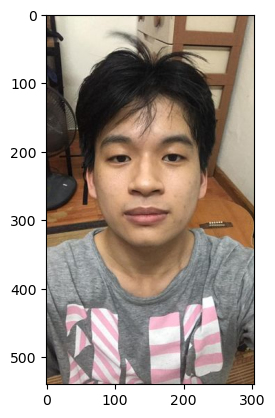

In [4]:
plt.imshow(khanh1[:,:,::-1])

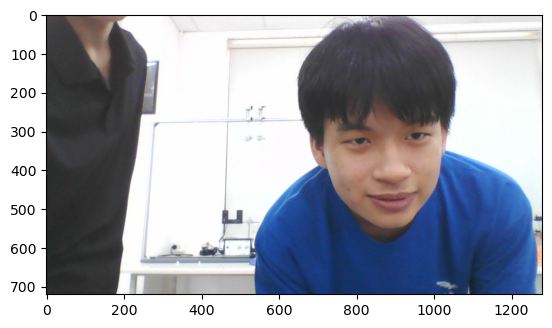

In [5]:
plt.imshow(khanh3[:,:,::-1])

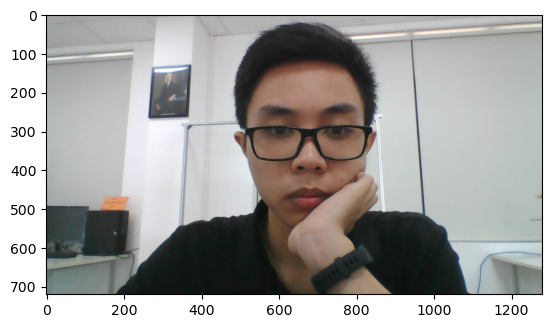

In [6]:
plt.imshow(hiep[:,:,::-1])

In [7]:
print(check(khanh1, khanh3))

/home/dotronghiep/anaconda3/lib/python3.10/site-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


0.7829524874687195


In [8]:
print(check(khanh1, hiep))

0.00018559237651061267


In [9]:
type(hiep)

numpy.ndarray